In [1]:
import csv
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
input_data_avg = pd.read_csv ('final_data.csv')
input_data_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   well_name               624 non-null    object 
 1   gross_thickness_Augila  624 non-null    float64
 2   gross_thickness_Gialo   624 non-null    float64
 3   gross_thickness_Gir     624 non-null    float64
 4   gross_thickness_Zelten  624 non-null    float64
 5   lat                     624 non-null    float64
 6   long                    624 non-null    float64
 7   top_basement_MD         624 non-null    float64
 8   top_seebase_MD          624 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 44.0+ KB


In [ ]:
input_data_avg.describe()

In [4]:
#cleaning the outlier into df using IQR score

Q1 = input_data_avg.quantile(0.20)

Q3 = input_data_avg.quantile(0.80)

IQR = Q3 - Q1



input_data_avg_clean = input_data_avg[~((input_data_avg < (Q1 - 1.5 * IQR)) |(input_data_avg > (Q3 + 1.5 * IQR))).any(axis=1)]

input_data_avg_clean.describe()

<ipython-input-4-51d57c654660>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  input_data_avg_clean = input_data_avg[~((input_data_avg < (Q1 - 1.5 * IQR)) |(input_data_avg > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-4-51d57c654660>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  input_data_avg_clean = input_data_avg[~((input_data_avg < (Q1 - 1.5 * IQR)) |(input_data_avg > (Q3 + 1.5 * IQR))).any(axis=1)]


,gross_thickness_Augila,gross_thickness_Gialo,gross_thickness_Gir,gross_thickness_Zelten,lat,long,top_basement_MD,top_seebase_MD
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,84.460907,401.299365,515.870090,143.479598,28.241113,20.856814,2653.436819,2720.619543
std,21.537534,78.337372,74.038344,28.140894,0.460262,1.207743,635.426353,659.157400
min,22.900000,169.200000,307.800000,69.500000,27.022159,17.179581,1506.610000,1531.000000
25%,77.400000,353.600000,480.700000,135.400321,28.008980,19.908088,2041.600000,2069.000000
50%,85.669925,396.410883,511.100000,135.400321,28.202871,21.206680,2770.620000,2880.000000
75%,92.300000,437.400000,549.600000,150.000000,28.395244,21.849683,3069.300000,3115.000000
max,147.200000,643.200000,729.100000,208.200000,29.572467,23.676663,4872.210000,4980.000000


In [ ]:
#split dataframe in 2 df (random selection based on %)

data1 = input_data_avg_clean.sample(frac = 0.962)

data2 = input_data_avg_clean.drop(data1.index)

data1.reset_index(drop=True, inplace=True)      
data2.reset_index(drop=True, inplace=True) 
data1


In [6]:
# build X and y numpy arrays

#keep just the column top_basement_MD and convert it into np array (without label) and reshape it in the right format for scikitlearn
y=data1['top_basement_MD'].values.reshape(-1,1)    #y=target data

#remove the column top_basement_MD from the df and convert it into np array (without label)
X=data1.drop(['top_basement_MD','well_name'],axis=1).values         #X=feature data


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
#Print R^2 metric
print(reg_all.score(X_test, y_test))

0.9060796115837983


In [8]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#Print rmse metric
print(rmse)

186.4939508728393


In [9]:
# build blind data
y_test_blind=data2['top_basement_MD'].values.reshape(-1,1)
X_test_blind=data2.drop(['top_basement_MD','well_name'],axis=1).values

In [10]:
y_pred_blind = reg_all.predict(X_test_blind)
reg_all.score(X_test_blind, y_test_blind)

0.702141572838113

In [11]:
rmse_blind=np.sqrt(mean_squared_error(y_test_blind,y_pred_blind))
print(rmse_blind)

254.50415809122532


In [12]:
# plotting 

import numpy as np
import pandas as pd
from numpy import linspace, meshgrid
from scipy.interpolate import griddata



In [ ]:
data2['predicted_basem']=y_pred_blind

data2

In [14]:
x= data2.loc[:,['long']].values
y=data2.loc[:,['lat']].values
z=data2.loc[:,['top_basement_MD']].values
z_pred=data2.loc[:,['predicted_basem']].values

z_diff=abs(z-z_pred)

Text(0, 0.5, 'lat')

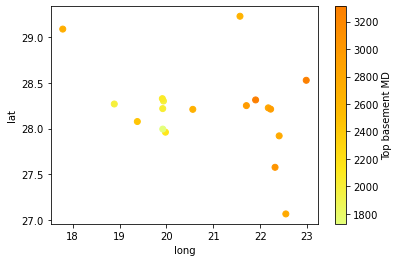

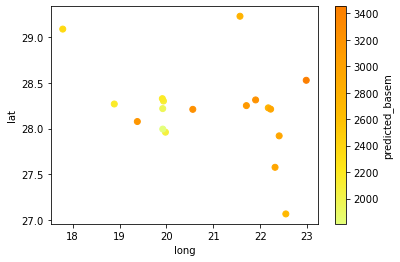

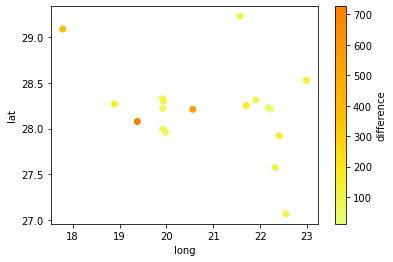

In [15]:
import matplotlib.pyplot as plt

#plot top basement from markers
plt.figure()

plt.scatter(x, y, c=z, cmap='Wistia')
cb = plt.colorbar()
cb.set_label('Top basement MD')
plt.xlabel('long')
plt.ylabel('lat')


#plot predicted basement from the model
plt.figure()

plt.scatter(x, y, c=z_pred, cmap='Wistia')
cb = plt.colorbar()
cb.set_label('predicted_basem')
plt.xlabel('long')
plt.ylabel('lat')

#plot difference
plt.figure()

plt.scatter(x, y, c=z_diff, cmap='Wistia')
cb = plt.colorbar()
cb.set_label('difference')
plt.xlabel('long')
plt.ylabel('lat')


Text(0, 0.5, 'lat')

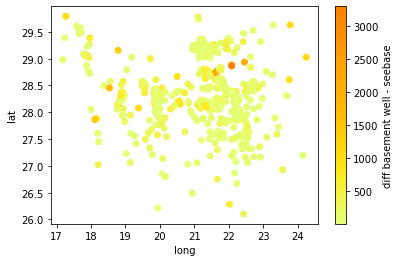

In [ ]:
x= data1.loc[:,['long']].values
y=data1.loc[:,['lat']].values
z_basement=data1.loc[:,['top_basement_MD']].values
z_seebase=z=data1.loc[:,['top_seebase_MD']].values
z_diff2=abs(z_basement-z_seebase)

plt.figure()

plt.scatter(x, y, c=z_diff2, cmap='Wistia')
cb = plt.colorbar()
cb.set_label('diff basement well - seebase')
plt.xlabel('long')
plt.ylabel('lat')